## Lisamaterjal II. Berti abil dokumentide sarnasuse tuvastamine

Viimase aja suurimad arengud keeletöötluses on seotud tehisnärvivõrkude (nn neuromudelite) kasutuselevõtuga. 
Neuromudelid on välja treenitud väga suurtel tekstikorpustel (nt EstBert on välja treenitud 1,1 miljardi sõnalisel korpusel) ning neid saab kohandada erinevate keeletöötluse ülesannete tarbeks, tulemused on aga sageli paremad kui traditsiooniliste masinõppemudelite rakendamisel.

Järgnevalt rakendame dokumentide võrdlemisel [eesti keele Berti mudelit](https://arxiv.org/abs/2011.04784). 
Bert-i mudel lisab teksti igale sõnele vektori, mida saab kasutada, sarnaselt sõnaloendusvektorite ja TF-IDF vektoritega, sõnade ja lausete (semantilisel) võrdlemisel, nt koosinussarnasuse abil (hea sissejuhatuse ja ülevaate Berti mudelite kohta leiad [siit](http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/)).

Kasutame EstNLTK [Berti veebiteenust](https://github.com/estnltk/estnltk/blob/main/tutorials/taggers/web_taggers/web_taggers.ipynb), mis sobib hästi väiksemate andmehulkade analüüsimiseks:

In [1]:
from estnltk import Text

In [2]:
from estnltk.taggers import BertEmbeddingsWebTagger

# Võtame kasutusele veebiteenusel põhineva Bert-i märgendaja
bert_embeddings_web_tagger = BertEmbeddingsWebTagger(url='https://api.tartunlp.ai/estnltk/tagger/bert')

In [3]:
# vajalikud sisendkihid
bert_embeddings_web_tagger.input_layers

('words', 'sentences')

In [4]:
# väljundkiht
bert_embeddings_web_tagger.output_layer

'bert_embeddings'

Tekstidena kasutame praktikumi näitelauseid:

In [5]:
texts = ['Teemade modelleerimine põhineb eeldusel, et erinevatest teemadest kirjutades kasutatakse mingil määral erinevaid sõnu.',
         'Nagu klasterdamine, on ka teemade modelleerimine juhendamata masinõppe valdkonda kuuluv ülesanne ehk me ei vaja märgendatud treeningkorpust.',
         'Teemade modelleerimise puhul leitakse aga korpusest esmalt seal esinevad teemad ehk sõnade tõenäosuslik jaotumine: iga teema puhul on erinevatel sõnadel erinev esinemise tõenäosus.',
         'Makaronivorm tähendab ahjuvormi makaronidest.',
         'Makaronivorm küpsetatakse ahjus ahjuvormi sees.',
         'Makaronivormi põhilised koostisosad lisaks makaronidele on muna ja piima segu, maitseained ning juust katteks.']

Moodustame lausete Text objektid ning lisame sõnedele Berti vektorid ( _embedding_-ud ):

In [6]:
bert_annotated = []
for text in texts:
    # Lisame vajalikud sisendmärgendused
    text_obj = Text(text).tag_layer(('words', 'sentences'))
    # Lisame Berti vektorid
    bert_embeddings_web_tagger.tag(text_obj)
    bert_annotated.append(text_obj)

Uurime tulemusi:

In [7]:
bert_annotated[0].bert_embeddings

Layer(name='bert_embeddings', attributes=('token', 'bert_embedding'), spans=SL[Span('Teemade', [{'token': 'teemade', 'bert_embedding': [-1.2705276012420654, 0.23216518759727478, -0.29476553201675415, -0.7983335852622986, -0.0016429572133347392, 0.09810247272253036, 0.422579824924469, -1.0010814666748047, -0.06659013032913208, -0.07561038434505463, -1.9770965576171875, -0.24175749719142914, 0.022272616624832153, -0.027127234265208244, 0.24081936478614807, -0.032784201204776764, -0.8268170356750488, -0.048250794410705566, 0.2949810326099396, 0.9940916895866394, 0.17339301109313965, 0.15293355286121368, 0.1657787263393402, 0.05198810249567032, -0.5217311978340149, 0.46575310826301575, 0.2938857674598694, 0.3756062984466553, -1.1187453269958496, 0.1879754662513733, -0.14912529289722443, -0.5737434029579163, -0.09777151048183441, -0.3147430717945099, 0.2719017565250397, 0.37672850489616394, 0.6729334592819214, 0.13353706896305084, -0.41261470317840576, -0.20989017188549042, 0.1099877655506134, 0.7660384774208069, 0.08525640517473221, -0.6225050687789917, -0.22655057907104492, -0.4089096188545227, -0.37070414423942566, 0.17421312630176544, 0.09171716868877411, -0.25140950083732605, -0.18896061182022095, 0.43583574891090393, -0.4541613459587097, 0.07317984849214554, 0.5362054705619812, -0.4344640374183655, 0.022532545030117035, 1.282725214958191, -0.30897700786590576, -0.570525050163269, -0.5097890496253967, 0.316965788602829, 0.405996173620224, -0.3222786486148834, 0.05696065351366997, 0.08339887857437134, -0.7161504030227661, 0.830089271068573, 0.0024021733552217484, 0.5947265028953552, -0.028129028156399727, 2.050168752670288, -0.5975198745727539, 0.6673911809921265, 0.7028025984764099, -0.3762069046497345, 0.44773241877555847, 0.9001754522323608, 0.31497183442115784, -0.683021605014801, 0.18493802845478058, -0.46057525277137756, -0.06832858175039291, 0.5132184028625488, -0.037577636539936066, -1.0502147674560547, -0.26390108466148376, 0.08073567599058151, 0.11023679375648499, 0.42613935470581055, -0.9940201044082642, -0.2980790436267853, -0.2776760458946228, -0.6742189526557922, -0.06563093513250351, 0.11181194335222244, 0.6172209978103638, 0.5440333485603333, 0.0525452084839344, -0.4668015241622925, -0.5713725090026855, 0.24260960519313812, 0.32923009991645813, -0.8854881525039673, 1.3543412685394287, 0.16113080084323883, -1.795104742050171, 0.16882717609405518, 0.13835176825523376, 0.031259097158908844, 0.684700608253479, -0.6078023314476013, -0.058280814439058304, -0.1943376660346985, -0.502915620803833, -0.19385817646980286, -0.20769630372524261, -0.07485803961753845, -0.20109713077545166, -1.0982164144515991, -0.06095275282859802, 0.03499210625886917, 0.49101221561431885, 0.4127790331840515, 0.29803305864334106, -0.37099161744117737, 0.03485647961497307, 0.22417104244232178, 0.3722740411758423, -2.1136631965637207, -1.6628203392028809, 0.09472113847732544, -0.5526386499404907, 0.04357755556702614, -0.5249063372612, 0.7165859341621399, 0.6625936627388, -0.3652828335762024, -0.5944889187812805, 0.19965782761573792, -0.22037869691848755, 0.4753641188144684, -0.8619242906570435, 0.6289966702461243, 0.10804836452007294, -0.06097088381648064, -0.5385422706604004, 0.5327540040016174, -0.427028089761734, 0.5410277843475342, -0.08965320140123367, -0.0494789257645607, -0.9414023160934448, -0.16273917257785797, -0.08819034695625305, 0.577873945236206, -0.3328549861907959, -0.36821675300598145, 0.7696459889411926, 0.0350649356842041, -0.1473904848098755, 0.08626291900873184, -1.7767508029937744, 0.03186715394258499, -0.08885341137647629, -0.33569827675819397, -0.0406847819685936, 0.1265944391489029, 0.25343871116638184, 0.7617741823196411, 0.586134672164917, -0.5532709956169128, 0.6924015283584595, -0.2902073860168457, 0.843867301940918, -0.5473265647888184, 0.784657895565033, 0.033828094601631165, -0.0680004209280014, 0.7711654901504517, -0.008331895805895329, 0.184138685464859, -0.08117013424634933, 0.01445579994469881, -0.24581982195

Mida väljundis tähele panna?

* **Berti sõnestus** -- Bert kasutab teistsugust sõnestamisviisi kui oleme tavaliselt harjunud kasutama, nt sõna "modelleerimine" on jagatud Bertil sõnedeks "modelleeri" + "##mine" ning sõna "põhine" on jagatud sõnedeks "poh" + "##ine". Tegemist on sõnestusega, mis on automaatselt korpuse põhjal loodud kasutades [BPE algoritmi](https://en.wikipedia.org/wiki/Byte_pair_encoding);

* **Berti vektor** (_bert_embedding_) -- Berti baasmudel kasutab 12 kihti, iga kiht on pikkusega 768. Praktikas on aga leitud, et kõige kasulikum on võtta iga sõne puhul välja 4 viimast kihti ja kasutada (liit)vektorina / _embedding_-una. Seetõttu omistab ka Berti veebiteenus igale sõnele vektori pikkusega 3072, mis on sisuliselt saadud 4 viimase kihi üksteise järele lükkimisel;

Varasemast tuttav _word2vec_ mudel lisab samuti sõnadele _embedding_-ud, aga _word2vec_ puhul on iga sõna vektor staatiline, st ei sõltu kontekstist. 
Berti poolt loodavad sõnavektorid sõltuvad (lause)kontekstist, mis võimaldab Bertil teha sõnade, lausete ja tekstide semantikas täpsemaid eristusi.

Lihtsaim viis Berti sõnavektoreid kasutada teksti klassifitseerimiseks on koguda iga teksti sõnavektorid kokku (moodustada nn lausevektor) ning leida seejärel keskmine üle lausevektori sõnavektorite.

Näide:

In [8]:
import numpy as np

text_embeddings = []
for text_obj in bert_annotated:
    # Kogume teksti sõnavektorid kokku
    sentence_vector = None
    for word_embedding in text_obj.bert_embeddings:
        word_vector = np.array([word_embedding.annotations[0]['bert_embedding']])
        if sentence_vector is None:
            sentence_vector = word_vector
        else:
            sentence_vector = np.concatenate((sentence_vector, word_vector), axis=0)
    # Leiame sõnavektorite keskmise -> kogu teksti iseloomustav vektor
    averages_vector = np.average(sentence_vector, axis=0)
    text_embeddings.append( averages_vector )

In [9]:
# Iga teksti jaoks on üks vektor
len(text_embeddings)

6

In [10]:
# Tekstivektori pikkus == Sõnavektori pikkus
text_embeddings[0].shape

(3072,)

Edasi kasutame praktikumimaterjalidest tuttavat koosinuskaugust tekstidevahelise sarnasuse leidmiseks:

In [11]:
from pandas import DataFrame
from sklearn.metrics.pairwise import cosine_distances

cos_dist_df = DataFrame(cosine_distances(text_embeddings))
cos_dist_df

,0,1,2,3,4,5
0,0.000000,0.175158,0.159362,0.321599,0.330689,0.305480
1,0.175158,0.000000,0.181278,0.327002,0.340284,0.283539
2,0.159362,0.181278,0.000000,0.333720,0.321597,0.278861
3,0.321599,0.327002,0.333720,0.000000,0.148604,0.180845
4,0.330689,0.340284,0.321597,0.148604,0.000000,0.239084
5,0.305480,0.283539,0.278861,0.180845,0.239084,0.000000


Viimase sammuna visualiseerime tulemused kuumakaardi / _heatmap_-i abil:

<Axes: >

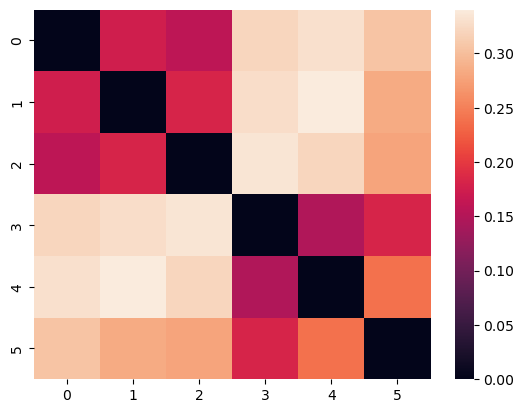

In [12]:
import seaborn as sns

sns.heatmap( cos_dist_df )

Nagu tulemustest näha, eristuvad Berti mudeli jaoks suhteliselt selgelt dokumendid 0-2 (klasterdamise teemaline jutt) ning 3-5 (toiduainete teemaline jutt).

### BertTagger praktikas

BertEmbeddingsWebTagger sobib hästi väiksemateks katsetusteks, aga suuremahuliseks tekstianalüüsiks tuleks Bert installida oma arvutisse.
Selleks tuleb kõigepealt installida lisapakett [estnltk_neural](https://github.com/estnltk/estnltk/tree/main/estnltk_neural), mis võimaldab kasutada BertTagger-it ilma veebiteenuseta. 
Vajaliku EstBert mudeli saab alla tõmmata automaatselt, selle kohta vt [BertTagger-i juhiseid](https://github.com/estnltk/estnltk/blob/main/tutorials/nlp_pipeline/E_embeddings/bert_embeddings_tagger.ipynb).


---